<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Fish_Species_Measurements_EDA_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# importing dataset
df=pd.read_csv("fish_data_set.csv")
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [ ]:
df.tail()

,species,length,weight,w_l_ratio
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21
4079,Sillaginopsis panijus,31.62,6.14,0.19


In [47]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [ ]:
df.nunique()

,0
species,9
length,1857
weight,249
w_l_ratio,57


In [ ]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [ ]:
df.shape

(4080, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [ ]:
df.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [ ]:
df.columns

Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

### **Visualizing the Data**

In [54]:
px.histogram(df,x='species',title='Species Distribution')

In [ ]:
fig=px.pie(df,names='species',hole=0.5,title='Species Distribution')
fig.show()

In [ ]:
fig=px.box(df,x='species',y='weight',title='Weight Distribution')
fig.show()

In [42]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


<Axes: ylabel='length'>

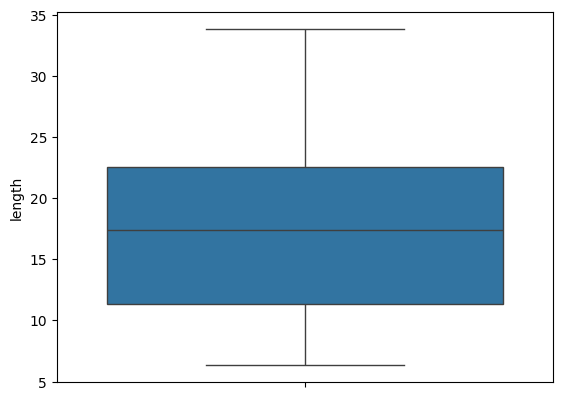

In [44]:
# Checking Outliers
sns.boxplot(df['length'])

<Axes: ylabel='w_l_ratio'>

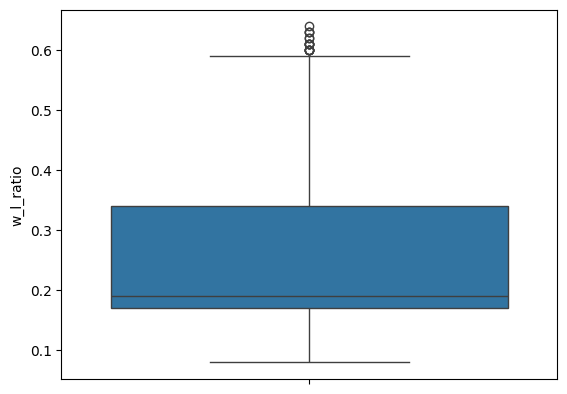

In [45]:
sns.boxplot(df['w_l_ratio'])

In [49]:
# Removing Outliers through IQR Method

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['w_l_ratio'].quantile(0.25)
Q3 = df['w_l_ratio'].quantile(0.75)
# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers
df = df[(df['w_l_ratio'] >= lower_bound) & (df['w_l_ratio'] <= upper_bound)]

<Axes: ylabel='w_l_ratio'>

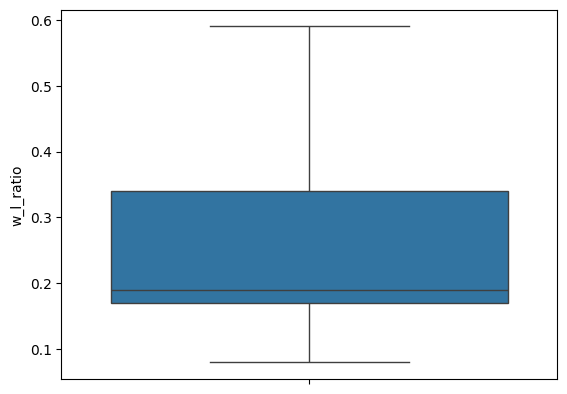

In [55]:
# After Removing Outliers

sns.boxplot(df['w_l_ratio'])

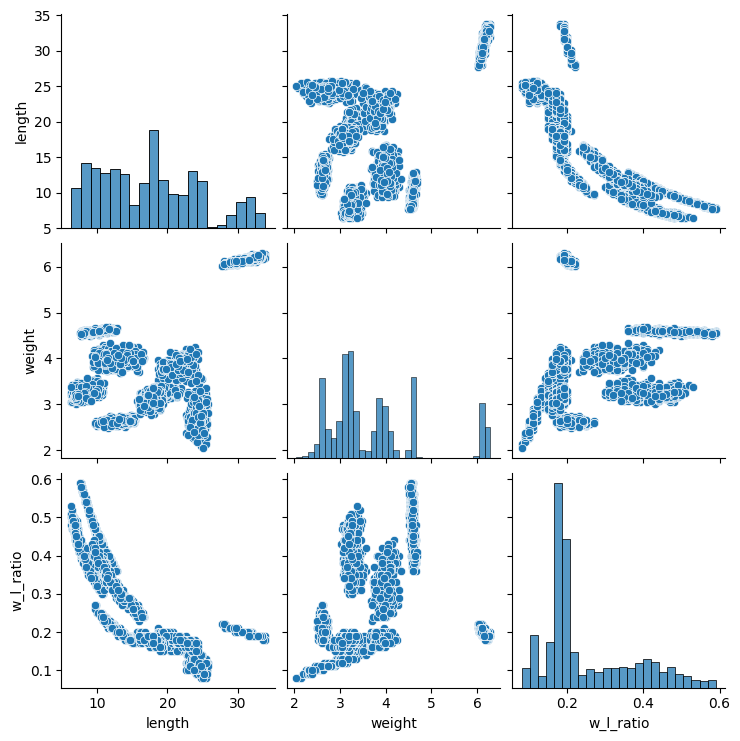

In [56]:
# Pair plot
sns.pairplot(df)